<span style="font-size:12px">

####  >> 토픽 모델링
##### LDA : 문서 컬렉션에서 숨겨진 주제를 찾아내는 생성형 모델
- document : 여러 topics 의 혼합
- topic : 여러 word의 분포
- word : 특정 topic에서 생성된 단어
- 문서들은 topic의 혼합으로 구성
    - 예시. 뉴스기사
        - 70% 정치 20% 경제 10% 스포츠
    - 토픽은 단어 분포를 가짐
        - 정치 (선거:0.2, 대통령: 0.15, 정부: 0.1 ... )
        - 경제 (주식:0.25, 금리:0.2, 은행:0.15)
-모든 문서를 토픽의 혼합, 토픽별 단어 분포를 랜덤하게 초기화
    - 과정을 반복하면
        - 각 단어가 어떤 토픽에서 나왔는지 추정
        - 각 문서의 토픽 비율을 업데이트
        - 각 토픽의 단어 분포를 업데이트

In [22]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from konlpy.tag import Okt

documents = [
    "Python 프로그래밍은 매우 강력하고 배우기 쉬워요",
    "머신러닝은 인공지능의 핵심 기술입니다",
    "자연어처리는 NLP라고도 불립니다",
    "딥러닝은 신경망을 이용한 학습 방법입니다",
    "데이터 분석은 통계학에 기반합니다",
    "파이썬으로 머신러닝 모델을 만들 수 있습니다",
    "인공지능 기술은 빠르게 발전하고 있습니다",
    "자연어처리 모델은 텍스트를 이해할 수 있어요"
]

# 단어 벡터화
cv = CountVectorizer(
    max_features=50,
    stop_words= ['은', '는', '이', '가', '을', '를', '그', '그리고'],
    min_df=1, max_df=0.9
)

doc_term_matrix = cv.fit_transform(documents)
feature_names = cv.get_feature_names_out()
print(f'문서 단어 행렬 : {doc_term_matrix.shape}')
print(f'단어목록 : {feature_names}, 단어목록갯수: {len(feature_names)}')

문서 단어 행렬 : (8, 36)
단어목록 : ['nlp라고도' 'python' '강력하고' '기반합니다' '기술은' '기술입니다' '데이터' '딥러닝은' '만들' '매우'
 '머신러닝' '머신러닝은' '모델은' '모델을' '발전하고' '방법입니다' '배우기' '분석은' '불립니다' '빠르게' '쉬워요'
 '신경망을' '이용한' '이해할' '인공지능' '인공지능의' '있습니다' '있어요' '자연어처리' '자연어처리는' '텍스트를'
 '통계학에' '파이썬으로' '프로그래밍은' '학습' '핵심'], 단어목록갯수: 36


In [ ]:
# LDA 모델 생성
lda_model = LatentDirichletAllocation(n_components=3    # 토픽(주제) 개수
                          , random_state=42
                          , max_iter=20
                          , learning_method='online'    # batch (모든 데이터를 한번에 다 써서 한번 학습), online (미니배치)
                          )
# 모델 학습 (전처리?? 엄밀히 모델은 아님...)
lda_output = lda_model.fit_transform(doc_term_matrix)
print(f"문서 주제 행렬 : {lda_output.shape}")
print(f"첫번째 문서의 주제 분포")
print(f"  Topic 0 : {lda_output[0, 0]:.4f}")
print(f"  Topic 1 : {lda_output[0, 1]:.4f}")
print(f"  Topic 2 : {lda_output[0, 2]:.4f}")

# 각 주제별로 상위 단어 출력
def display_topic(model, feature_names, n_top_words = 5) :
    print(f"\n=== 각 주제별 상위 단어 ===")
    for topic_idx, topic in enumerate(model.components_) :
        # 가장 높은 가중치를 가진 단어의 인덱스를 호출
        top_words_idx = topic.argsort()[-n_top_words:][::-1]
        top_words = [ feature_names[i] for i in top_words_idx ]
        top_weights = [ topic[i] for i in top_words_idx ]
        print(f"[topic {topic_idx}]")
        for word, weight in zip(top_words, top_weights) :
            print(f"  {word} : {weight:.4f}")
        print()

display_topic(lda_model, feature_names)

문서 주제 행렬 : (8, 3)
첫번째 문서의 주제 분포
  Topic 0 : 0.0481
  Topic 1 : 0.0483
  Topic 2 : 0.9036

=== 각 주제별 상위 단어 ===
[topic 0]
  기술은 : 1.3185
  모델은 : 1.3178
  핵심 : 1.3125
  인공지능 : 1.3124
  기술입니다 : 1.3116

[topic 1]
  있습니다 : 1.3128
  모델을 : 1.3109
  데이터 : 1.3104
  분석은 : 1.3095
  머신러닝 : 1.3091

[topic 2]
  매우 : 1.3191
  강력하고 : 1.3182
  python : 1.3135
  nlp라고도 : 1.3131
  배우기 : 1.3099



In [25]:
# 각 문서의 주요 주제
print (f'각 문서의 주요 주제 --------')
for doc_idx, doc in enumerate(lda_output):
    main_topic = np.argmax(doc)
    confidence = doc[main_topic]   #비율??
    print(f'문서 : {doc_idx}, topic: {main_topic}, 비율: {confidence:.4f}')
    print(f'원문 : {documents[doc_idx]}')
    print()    
    

각 문서의 주요 주제 --------
문서 : 0, topic: 2, 비율: 0.9036
원문 : Python 프로그래밍은 매우 강력하고 배우기 쉬워요

문서 : 1, topic: 0, 비율: 0.8650
원문 : 머신러닝은 인공지능의 핵심 기술입니다

문서 : 2, topic: 2, 비율: 0.8312
원문 : 자연어처리는 NLP라고도 불립니다

문서 : 3, topic: 2, 비율: 0.8876
원문 : 딥러닝은 신경망을 이용한 학습 방법입니다

문서 : 4, topic: 1, 비율: 0.8655
원문 : 데이터 분석은 통계학에 기반합니다

문서 : 5, topic: 1, 비율: 0.8867
원문 : 파이썬으로 머신러닝 모델을 만들 수 있습니다

문서 : 6, topic: 0, 비율: 0.8855
원문 : 인공지능 기술은 빠르게 발전하고 있습니다

문서 : 7, topic: 0, 비율: 0.8876
원문 : 자연어처리 모델은 텍스트를 이해할 수 있어요



In [26]:
# 청와대 국민청원 데이터로드
import os
import urllib.request
import ssl
url = 'https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition_sampled.csv'

# ssl 인증서 무시
ssl._creat_default_https_context = ssl._create_unverified_context

urllib.request.urlretrieve(url, './data/sample.csv')


('./data/sample.csv', <http.client.HTTPMessage at 0x18e1c6ed3d0>)

In [32]:
import pandas as pd
df = pd.read_csv("./data/sample.csv")
df=df[:3000]
df

,article_id,start,end,answered,votes,category,title,content
0,58,2017-08-19,2017-11-17,0,21,일자리,국토교통부와 한국주택협회가 행한 부당한 행위와 권력남용에 대한 내용을 청원드립니다.,안녕하세요? 존경하고 지지하는 문재인 대통령님!\n저는 성남시 분당구 정자동 주택전...
1,63,2017-08-20,2017-09-04,0,1,보건복지,살려주세요..,안녕하십니까?\n저는 올해 63세된 홀로 사는 늙은 여자입니다...\n작년 중복날 ...
2,136,2017-08-20,2017-11-18,0,4,육아/교육,고등학교 교육 내용 수준을 낮춰주시고 실용적인 내용을 담아주세요!,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...
3,141,2017-08-20,2017-08-27,0,0,기타,한국문화에 창조적요소를 심자,안녕하십니까\n저는 92년 한국을 알게된 종국동포 입니다.\n[저는 한 중소기업에...
4,148,2017-08-20,2017-11-18,0,7,외교/통일/국방,다문화정책 및 할랄 인증 제도,대한민국과 국민을 위해 밤낮 없이 수고하시는 대통령을 비롯한 위정자 분들께\n대한민...
...,...,...,...,...,...,...,...,...
2995,62102,2017-12-09,2018-01-08,0,2,경제민주화,금리에 대하여,시중은행의 즐거운 비명에 대하여 한소리 하겠습니다. 최근 기준금리 인상의 분위기에 ...
2996,62114,2017-12-09,2018-01-08,0,7,외교/통일/국방,한국여성들도 어떤 식으로든 국방의무 이행 청원합니다,외세의 간섭은 점점 심해져 가고 있고 지난날의 역사를 되돌아봐도 어렵사리 지켜 온 ...
2997,62129,2017-12-09,2018-01-08,0,24,인권/성평등,동대문 도매시장 주5일제,평일도 13시간근무 이고 법정공휴일인 크리스마스 어린이날 모두 다 근무하고 주6일에...
2998,62184,2017-12-09,2018-01-08,0,0,문화/예술/체육/언론,시청자 없는 그들만의 지상파 UHD방송 개국,"5월 31일 지상파 UHD방송 개국→시청자가 없다!\n지상파 UHD방송은, 방송의 ..."


In [33]:
df.shape

(3000, 8)

In [34]:
# 한국어 전처리
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt
okt = Okt()
# 명사만, 그리고 한글자 이상만 가져오기
def tokenizer(doc):
    return [ token for token in okt.nouns(doc) if len(token) > 1]
cv = CountVectorizer(
    max_features=1000,
    min_df=5, 
    max_df=0.5,
    tokenizer=tokenizer
)
pet_cv = cv.fit_transform(df.content)
print(f'countervectorize 형태 : {pet_cv.shape}')

c:\Users\playdata2\miniconda3\envs\LLM\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


countervectorize 형태 : (3000, 1000)


In [35]:
len(df.category.unique())

17

In [36]:
# LDA 모델 학습
from sklearn.decomposition import LatentDirichletAllocation
import time
# 시간측정
start_time = time.time()
lda = LatentDirichletAllocation(n_components=len(df.category.unique()),
                                n_jobs=-1,
                                random_state=42)
pet_topics = lda.fit_transform ( pet_cv )
elapsed_time = time.time() - start_time
print (f'lda 학습시간 : {elapsed_time:.2f}초')

lda 학습시간 : 20.16초


In [41]:
# 토픽단어 출력함수
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}: ", end='')
        top_indices = topic.argsort()[:-n_top_words-1:-1]
        top_words = [feature_names[i] for i in top_indices]
        print(", ".join(top_words))
feature_names = cv.get_feature_names_out()
print_top_words(lda, feature_names,15)    

Topic #0: 공무원, 제도, 장애인, 의무, 행정, 모든, 헌법, 국가, 청와대, 폐지, 법률, 임산부, 시험, 경우, 국민
Topic #1: 국가, 질병, 훈련, 청원, 병원, 발생, 군대, 치료, 직무, 수행, 가족, 국민, 관련, 사건, 교육
Topic #2: 이명박, 출국금지, 조두순, 반대, 금지, 출국, 대통령, 청원, 교사, 적폐, 수사, 기간, 청산, 임용, 구속
Topic #3: 학생, 학교, 수능, 시험, 대학, 공부, 생각, 교육, 전형, 교실, 초등, 수시, 수험생, 연기, 준비
Topic #4: 경찰, 범죄, 불법, 국민, 위해, 만행, 조직, 사리, 사욕, 고문, 대한민국, 극악, 무도, 무고, 진급
Topic #5: 경찰, 대한민국, 국민, 위해, 조직, 범죄, 사욕, 사리, 무고, 진급, 사용, 전문, 개혁, 불법, 사건
Topic #6: 아이, 경찰, 선생님, 사건, 학교, 조사, 신고, 수사, 검찰, 검사, 학교폭력, 사과, 판사, 사실, 경찰서
Topic #7: 민원, 북한, 계획, 대통령, 문재인, 경상북도, 공원, 러시아, 정부, 이송, 결정, 도시, 지법, 대한, 회신
Topic #8: 청소년, 보호, 폐지, 처벌, 피해자, 생각, 사건, 범죄, 가해자, 아이, 폭행, 소년법, 사람, 부산, 여중생
Topic #9: 안전, 교수, 원전, 관리, 지원, 생명, 업무, 이국, 센터, 외상, 용역, 지진, 국민, 일자리, 문제
Topic #10: 주민, 의견, 위원회, 문제, 마을, 동의, 하나, 공사, 대한, 내용, 금융, 통해, 책임, 답변, 대해
Topic #11: 국민, 나라, 아이, 대통령, 우리, 대한민국, 교사, 생각, 세금, 국가, 한국, 미국, 어린이집, 보육, 지금
Topic #12: 정부, 생각, 사업, 사람, 국민, 지역, 주택, 사용, 대한, 기업, 지금, 아파트, 서민, 대출, 현재
Topic #13: 교육, 청원, 우리, 생각, 문제, 사회, 학교, 시간, 저희, 지금, 대한민국, 사람, 사이트

In [46]:

# 토픽 트랜드 분석
# 시간 정보 추출
df['period'] = pd.to_datetime(df['start']).dt.strftime('%Y-%m')
# 토픽 데이터 프레임
topic_columns = [f'Topic{i}' for i in range(len(df.category.unique()))]
trend_data = pd.DataFrame(pet_topics,columns=topic_columns)
trend_data['period'] = df['period'].values
trend_data.head(3)


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,period
0,0.000264,0.000264,0.000264,0.000264,0.000264,0.000264,0.000264,0.107372,0.000264,0.000264,0.037534,0.000264,0.794304,0.000264,0.057361,0.000264,0.000264,2017-08
1,0.000735,0.000735,0.000735,0.000735,0.000735,0.000735,0.000735,0.000735,0.000735,0.000735,0.000735,0.000735,0.000735,0.000735,0.000735,0.150072,0.838898,2017-08
2,0.001252,0.001252,0.001252,0.479622,0.001252,0.001252,0.001252,0.001252,0.001252,0.001252,0.001252,0.001252,0.001252,0.501604,0.001252,0.001252,0.001252,2017-08


In [44]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


기간별 토픽 분포:
           Topic0    Topic1    Topic2  ...   Topic14   Topic15   Topic16
period                                 ...                              
2017-08  0.052538  0.039657  0.040993  ...  0.071288  0.043781  0.144983
2017-09  0.027954  0.018811  0.022390  ...  0.031374  0.022035  0.084129
2017-10  0.055671  0.033026  0.035595  ...  0.054676  0.031968  0.158941
2017-11  0.036114  0.025547  0.294711  ...  0.027834  0.025067  0.074405
2017-12  0.063286  0.036333  0.067676  ...  0.048097  0.023602  0.137500

[5 rows x 17 columns]


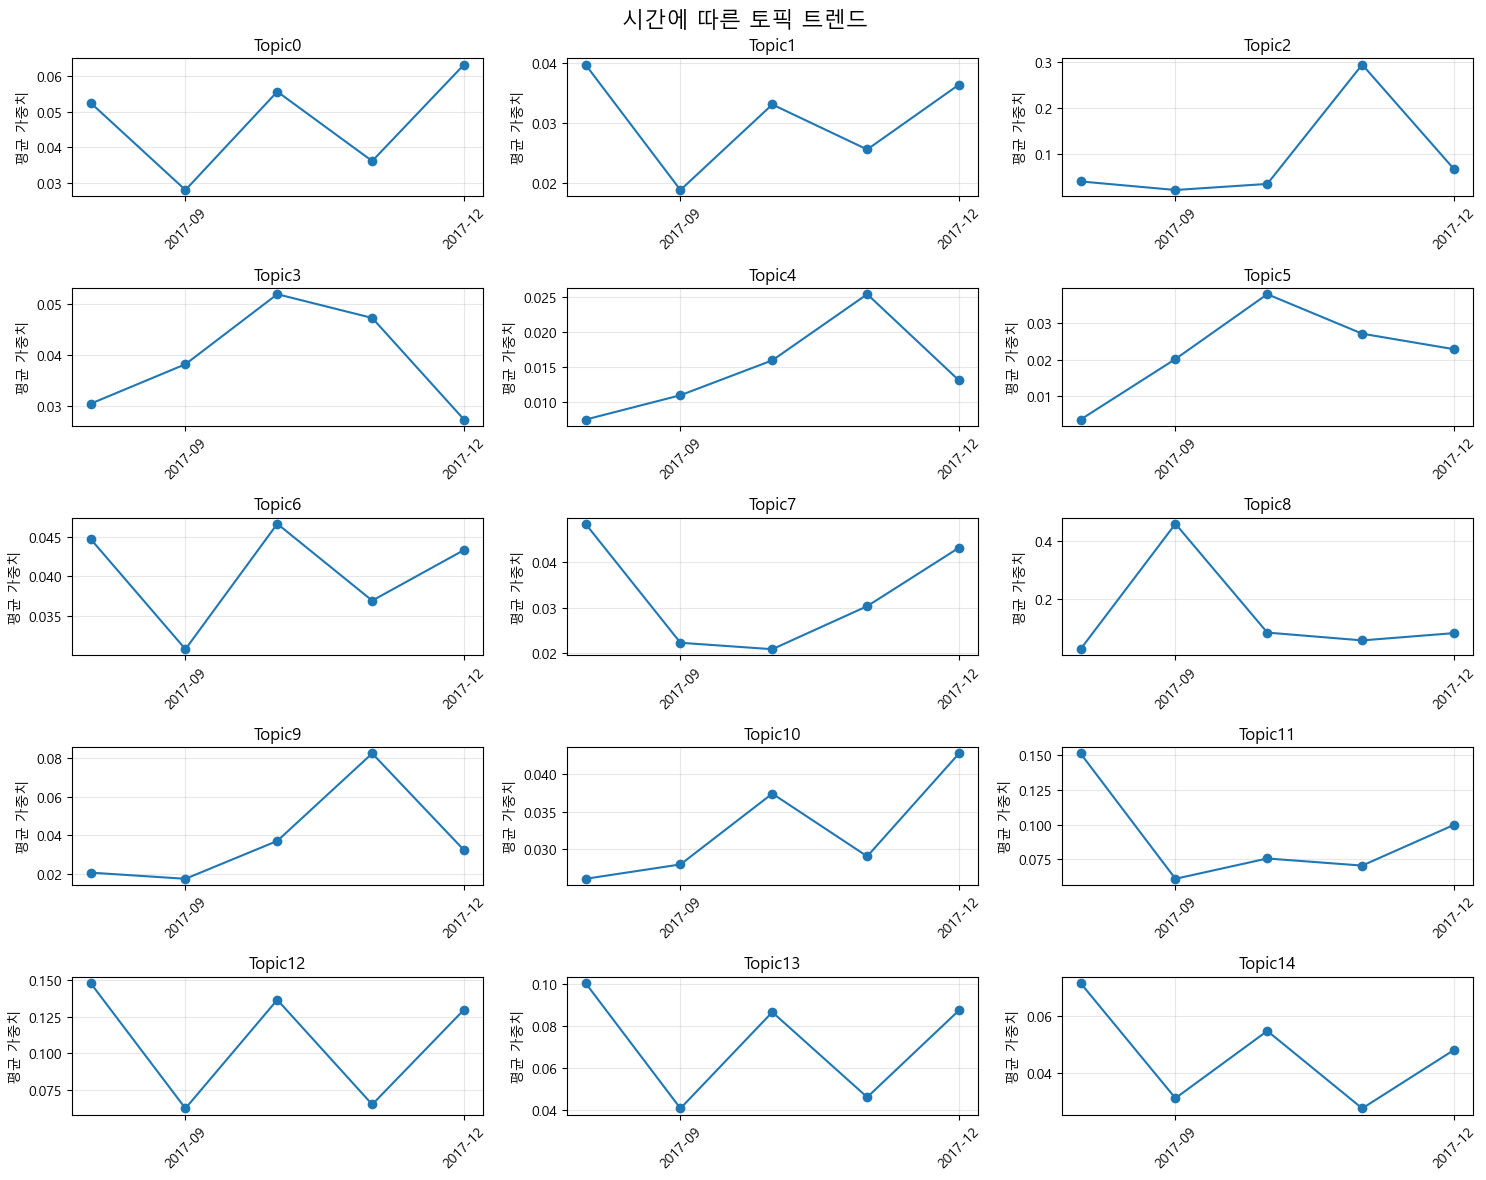

In [47]:
# 기간별 평균 토픽 가중치 계산
trend = trend_data.groupby('period').mean()

print("\n기간별 토픽 분포:")
print(trend.head())

# 시간 트렌드 시각화
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, axes = plt.subplots(5, 3, figsize=(15, 12))
fig.suptitle('시간에 따른 토픽 트렌드', fontsize=16)

# x축을 datetime으로 변환
trend.index = pd.to_datetime(trend.index)
trend_sorted = trend.sort_index()

for idx, (ax, topic) in enumerate(zip(axes.flat, topic_columns)):
    ax.plot(trend_sorted.index, trend_sorted[topic], marker='o')
    ax.set_title(topic)
    ax.set_ylabel('평균 가중치')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [48]:
df.category.unique()

array(['일자리', '보건복지', '육아/교육', '기타', '외교/통일/국방', '행정', '교통/건축/국토', '정치개혁',
       '안전/환경', '문화/예술/체육/언론', '경제민주화', '저출산/고령화대책', '농산어촌', '인권/성평등',
       '성장동력', '미래', '반려동물'], dtype=object)